# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Brandon Born
- Katherine Kim
- Karthik Guruvayurappan
- Evan Chen

<a id='research_question'></a>
# Research Question

What is the relationship between government policies and agreements and reduced global carbon emissions of countries from 1970 to 2018?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Datasets

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Both the Edgar CO2 Emissions Dataset and Climate Policy Dataset are contained in a CSV file which means the data for both is in a semi-structured format. The data itself is already tidy. Each variable we are measuring is in a single column while every observation of a variable is in a different row resulting in rectangular data. All that is left is to clean the data. 

Our data cleaning steps include: 
- identifying any null values and dropping (if applicable) 
- checking the data for duplicate entries
- changing column names (if applicable)
- standardizing the responses (if applicable). 

### Climate Policy Dataset

In [2]:
# read in Climate Policy Dataset
climate_policy_data = pd.read_csv('./data/climate_policy_database_policies_export.csv')
climate_policy_data.head()

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN


In [3]:
# list columns from dataset
climate_policy_data.columns

Index(['Policy ID', 'Country ISO', 'Policy name', 'Policy Title',
       'Jurisdiction', 'Supranational region', 'Country',
       'Subnational region or state', 'City or local',
       'Type of policy instrument', 'Sector name', 'Policy description',
       'Policy type', 'Policy stringency', 'Implementation state',
       'Date of decision', 'Start date of implementation',
       'End date of implementation', 'High impact', 'Policy objective',
       'Source or references', 'Impact indicators: comments',
       'Impact indicators: name', 'Impact indicators: value',
       'Impact indicators: base year', 'Impact indicators: target year'],
      dtype='object')

In [4]:
# select necessary columns from the dataset
climate_policy_data = climate_policy_data[['Country ISO', 'Policy name', 'Policy Title', 'Country', 
                                           'Sector name', 'Policy type', 'Date of decision', 
                                           'Policy objective']]

In [5]:
# analyze nans from dataset
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         496
Date of decision    132
Policy objective     60
dtype: int64

In [6]:
# drop nan values for necesary columns for analysis
(climate_policy_data['Date of decision'].isna()).sum()

132

In [7]:
climate_policy_data = climate_policy_data.dropna(axis=0, subset=['Date of decision'])
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


In [8]:
# get unique countries
climate_policy_data['Country ISO'].unique()

array(['USA', 'BIH', 'MKD', 'PHL', 'CPV', 'VUT', 'BRA', 'VNM', 'UKR',
       'THA', 'ZAF', 'RUS', 'MAR', 'MEX', 'JPN', 'IDN', 'EUE', 'ETH',
       'COL', 'CHN', 'CAN', 'AUS', 'ARG', 'PYF', 'AND', 'MCO', 'GBR',
       'NOR', 'CHE', 'MDA', 'NZL', 'FJI', 'MHL', 'TON', 'PNG', 'BRN',
       'KOR', 'KHM', 'SGP', 'MNG', 'KGZ', 'PRK', 'ECU', 'SYR', 'BGD',
       'NPL', 'MDV', 'AGO', 'LBN', 'ARE', 'SSD', 'KEN', 'RWA', 'ZMB',
       'GRD', 'ISL', 'CHL', 'PER', 'SEN', 'SUR', 'CRI', 'PAN', 'NIC',
       'JAM', 'DOM', 'CMR', 'GRC', 'SWE', 'IND', 'FRA', 'ESP', 'ITA',
       'SAU', 'SDN', 'DNK', 'BEL', 'DEU', 'LKA', 'BGR', 'TUR', 'UZB',
       'SLB', 'NLD', 'TGO', 'LUX', 'COD', 'FIN', 'TUN', 'SVK', 'GMB',
       'MNE', 'URY', 'TLS', 'TZA', 'IRQ', 'ISR', 'PRY', 'NGA', 'BEN',
       'AFG', 'ERI', 'NRU', 'NAM', 'MOZ', 'FSM', 'ZWE', 'STP', 'GAB',
       'GHA', 'GEO', 'GUY', 'GTM', 'GNB', 'GNQ', 'GIN', 'HTI', 'COK',
       'CIV', 'NER', 'MUS', 'MRT', 'NIU', 'MLI', 'MYS', 'MWI', 'MDG',
       'LIE', 'LBR',

In [9]:
# ensure there is a one to one mapping between Country ISO and Country
print(climate_policy_data['Country ISO'].nunique())
print(climate_policy_data['Country'].nunique())

194
194


In [10]:
# analyze sector name data
climate_policy_data['Sector name'].value_counts()

General                                                                                            979
Electricity and heat, Renewables                                                                   693
Electricity and heat                                                                               288
Transport                                                                                          243
Buildings                                                                                          206
                                                                                                  ... 
Electricity and heat, General, Nuclear, Gas, Oil, Renewables                                         1
Transport, Shipping, Buildings, Appliances                                                           1
Industry, Fossil fuel exploration and production, Waste CH4                                          1
Transport, Buildings, General, Light-duty vehicles, Shipping, Appliances,

In [11]:
# check data types
climate_policy_data.dtypes

Country ISO          object
Policy name          object
Policy Title         object
Country              object
Sector name          object
Policy type          object
Date of decision    float64
Policy objective     object
dtype: object

In [12]:
# check data shape
climate_policy_data.shape

(4988, 8)

In [13]:
# drop duplicates
climate_policy_data = climate_policy_data.drop_duplicates()

In [14]:
# check data shape
climate_policy_data.shape

(4754, 8)

### Edgar CO2 Dataset

The following is the code used to clean and briefly explore the Edgar CO2 dataset. 

In [15]:
#Reads in dataset from where it was saved in datahub
#For the Edgar CO2 emissions dataset
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv')
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


In [16]:
# Check for null values, only null values appear in emissions column
df.isna().any()

Code         False
Name         False
Sector       False
Year         False
Emissions     True
dtype: bool

In [17]:
# number of null/missing values in Emissions column
df['Emissions'].isnull().sum()

387

In [18]:
#Seeing the total emissions by country in order to see if the null values affect calculations, which they don’t so we will keep the null values in the dataset
df.groupby('Name').agg('sum').sort_values(by='Emissions', ascending=False)['Emissions']

Name
United States                                   256355.650474
China                                           215491.859571
Russia                                           85982.870481
Japan                                            55297.538635
Germany                                          46955.011838
                                                    ...      
Kiribati                                             1.309827
Falkland Islands                                     0.743025
Anguilla                                             0.583611
Saint Helena, Ascension and Tristan da Cunha         0.336218
Faroes                                               0.074013
Name: Emissions, Length: 210, dtype: float64

In [19]:
# No duplicate rows
df.duplicated().any()

False

In [20]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


<AxesSubplot:ylabel='Frequency'>

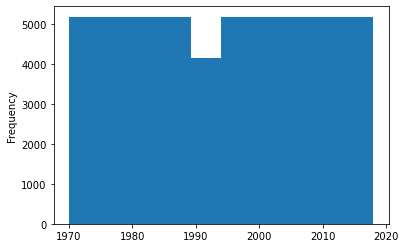

In [21]:
# check distribution of years
df['Year'].plot(kind='hist')

In [22]:
# check distribution of countries
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

<AxesSubplot:>

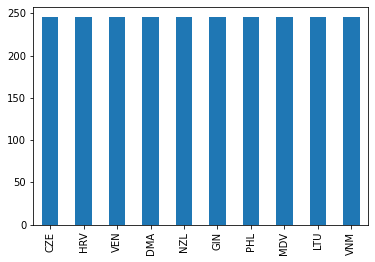

In [23]:
df['Code'].value_counts().nlargest(10).plot(kind='bar')

In [24]:
# ensure one to one mapping between country names and codes
print(df['Name'].nunique())
print(df['Code'].nunique())

210
210


In [25]:
# check sector value counts
df['Sector'].value_counts()

Transport                      10241
Other sectors                  10192
Power Industry                 10143
Buildings                      10094
Other industrial combustion    10094
Name: Sector, dtype: int64

# Data Analysis & Results

## EDA

### Climate Policy Dataset

**Structure**: This dataset is a single table stored in a csv format (tabular, semi-structured data), and has 4754 unique observations with 8 variables (columns).

In [26]:
# view the shape of the climate data
climate_policy_data.shape

(4754, 8)

**Granularity**: Each observation in this dataframe represents a climate policy passed by a national government.

In [27]:
# preview dataframe to understand the granularity
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


**Scope**: Overall, the data is mostly complete, but has some missingness in the sector name, policy type, and policy objective columns. It seems that missingness occurs more in more general policies and is related to the other columns with missingness, but there is also some randomness in the missingness. The only quantitative variable is the date of decision, which based on descriptive statistics and a histogram, appears to have a left-skewed distribution. There are 98 outlier years, but these outliers should remain in the dataset since they are only outliers due to an increasing amount of recent climate policies. A barplot of the 20 countries with the most climate policies passed reveals that the United States passes the most climate policies, with roughly 425 policies passed. 

**Temporality**: The left-skewed distribution of decision dates indicates more policies in recent years. This is likely due to increasing awareness surrounding climate change in recent years. The data are presented on a year level, beginning around 1930 and ranging all the way into the present (2021).

In [28]:
# summarize data missingness
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         391
Policy type         461
Date of decision      0
Policy objective     59
dtype: int64

In [29]:
# analyze sector name missingness
climate_policy_data[climate_policy_data['Sector name'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
429,ESP,Resolution of 10 April 2017 of the State Secre...,Resolution of the State Secretary of Energy,Spain,NaN,Renewables,2017.0,Mitigation
626,UZB,Resolution on Further Development of Renewable...,Resolution on Further Development of Renewable...,Uzbekistan,NaN,Renewables,2016.0,Mitigation
813,ESP,FNEE: Aid Programme for Desalination Plants Sp...,FNEE: Aid Programme for Desalination Plants,Spain,NaN,Energy efficiency,2015.0,Mitigation


In [30]:
# analyze policy type missingness
climate_policy_data[climate_policy_data['Policy type'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
131,CRI,Intersectoral agreement to reduce emissions in...,Intersectoral agreement to reduce emissions in...,Costa Rica,Transport,NaN,2019.0,"Mitigation, Energy access"
152,DNK,Climate Act Denmark (2019),Climate Act,Denmark,General,NaN,2019.0,Mitigation
167,SWE,Ordinance (2019:525) on State Aid for the Inst...,Ordinance (2019:525) on State Aid for the Inst...,Sweden,"Transport, Low-emissions mobility",NaN,2019.0,Mitigation


In [31]:
# analyze policy objective missingness
climate_policy_data[climate_policy_data['Policy objective'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
18,ZAF,Biofuels Regulatory Framework (BRF) to impleme...,Biofuels Regulatory Framework (BRF) to impleme...,South Africa,Transport,Renewables,2020.0,NaN
35,COL,Non-conventional renewable energy auction Colo...,Non-conventional renewable energy auction,Colombia,"Electricity and heat, Renewables",Renewables,2019.0,NaN
130,ARG,Grid expansion tenders Argentina (2019),Grid expansion tenders,Argentina,Electricity and heat,Renewables,2019.0,NaN
138,USA,Affordable Clean Energy (ACE) United States of...,Affordable Clean Energy (ACE),United States of America,"Electricity and heat, Coal",Energy efficiency,2019.0,NaN
198,CAN,Amendment 14 - Energy Efficiency Regulations -...,Amendment 14 - Energy Efficiency Regulations -...,Canada,"Buildings, Appliances",Energy efficiency,2019.0,NaN


In [32]:
# preview descriptive statistics (for date of decision only)
climate_policy_data.describe()

,Date of decision
count,4754.000000
mean,2007.921750
std,8.143114
min,1927.000000
25%,2004.000000
50%,2009.000000
75%,2014.000000
max,2021.000000


In [33]:
# count outliers in year
iqr = 2014-2004
lower_bound = 2004 - 1.5 * iqr 
upper_bound = 2014 + 1.5 * iqr
((climate_policy_data['Date of decision'] > upper_bound) | (climate_policy_data['Date of decision'] < lower_bound)).sum()

98

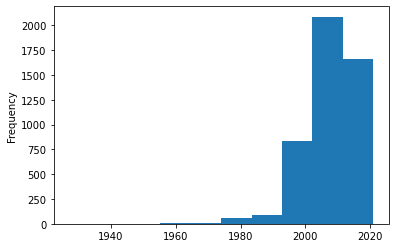

In [34]:
# generate plot of years to analyze values
climate_policy_data['Date of decision'].plot(kind='hist');

The distribution of years is left-skewed, with more policies in more recent years, likely reflective of increasing awareness of climate change.

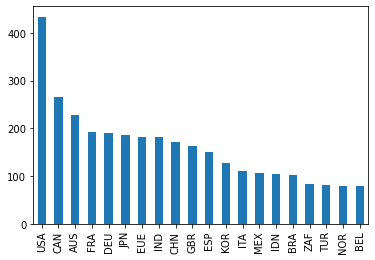

In [35]:
# generate plot of top countries to analyze values
climate_policy_data['Country ISO'].value_counts().nlargest(20).plot(kind='bar');

The United States has the most climate policies passed, just over 400 policies. The 20 countries with the most policies all have roughly 100 policies or more.

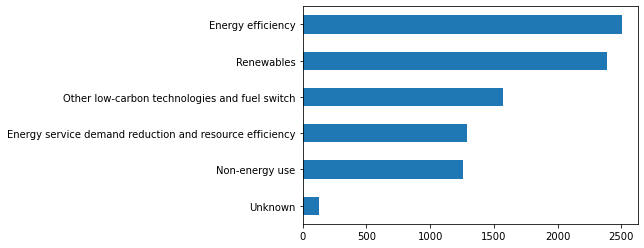

In [36]:
# plot distribution of policy types
pd.Series(climate_policy_data['Policy type'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).plot(kind='barh');

The two most common types of policy types are energy efficiency and renewables.

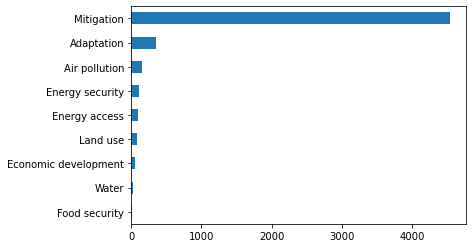

In [37]:
# plot distribution of policy objective
pd.Series(climate_policy_data['Policy objective'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).plot(kind='barh');

The most common policy objective is mitigation by far.

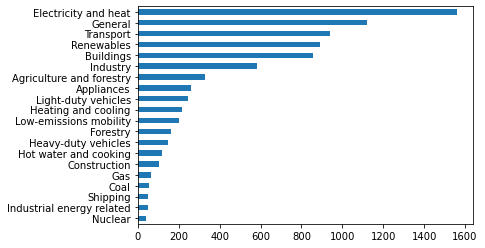

In [38]:
# plot distribution of sectors
pd.Series(climate_policy_data['Sector name'].str.split(', ').dropna()
          .sum()).value_counts(ascending=True).nlargest(20).sort_values(ascending=True).plot(kind='barh');

The five most common sectors are electricity and heat, general, transport, renewables, and buildings.

**Faithfulness**: This dataset is collected, updated, and maintained by the NewClimateInstitute and keeps track of all mitigation policies passed towards climate change. This is a reliable data source. However, since the data is only updated periodically, the specific CSV file used in this analysis might be a little bit out of date. 

### Edgar CO2 Dataset

In [39]:
df.columns

Index(['Code', 'Name', 'Sector', 'Year', 'Emissions'], dtype='object')

**Structure of the Edgar CO2 emissions dataset:** tabular data with individual observations in rows and variables in columns


Therefore, we do not necessarily need to change the way the data is stored. 

In [40]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


**Granularity of Edgar CO2 emissions dataset:** group-level over time 

In [41]:
print('(rows, columns):',(df.shape))
print('Number of countries in dataset:',(df['Code'].nunique()))

(rows, columns): (50764, 5)
Number of countries in dataset: 210


**Scope of Edgar CO2 emissions dataset:** According to Google and the ISO Country Code standards, there are 249 countries in the world with 194 of them being independent. Therefore, our data has a relatively large scope. Although we cannot definitively say that we can understand all CO2 emissions from every country using this data, the scope of our question is still relevant. 

In [42]:
print('Number of years:',(df['Year'].nunique()))
print('Start year:',(df['Year'][0]))
print('End year:',(df['Year'][len(df)-1]))

Number of years: 49
Start year: 1970
End year: 2018


**Temporality of Edgar CO2 emissions dataset:** We have data about CO2 emissions from 1970 to 2018 about 210 countries. 

**Faithfulness of Edgar CO2 emissions dataset:** Our data comes from EDGAR, the Emissions Database for Global Atmospheric Research. According to EDGAR's website, they provide independent emission data estimates regardless of what individual countries reported or by the UNFCCC, the United Nationals Framework Convention on Climate Change, using a consistent methodology. We can say that our data is accurate as each observation is not self-reported and is collected in a systematic fashion. 

In [43]:
# Checking if there is 49 observations for each country from each sector 
# grouping sectors to see if each has 49 observations 

all(df.groupby('Code').Sector.value_counts().eq(49))

True

<Figure size 1440x1440 with 0 Axes>

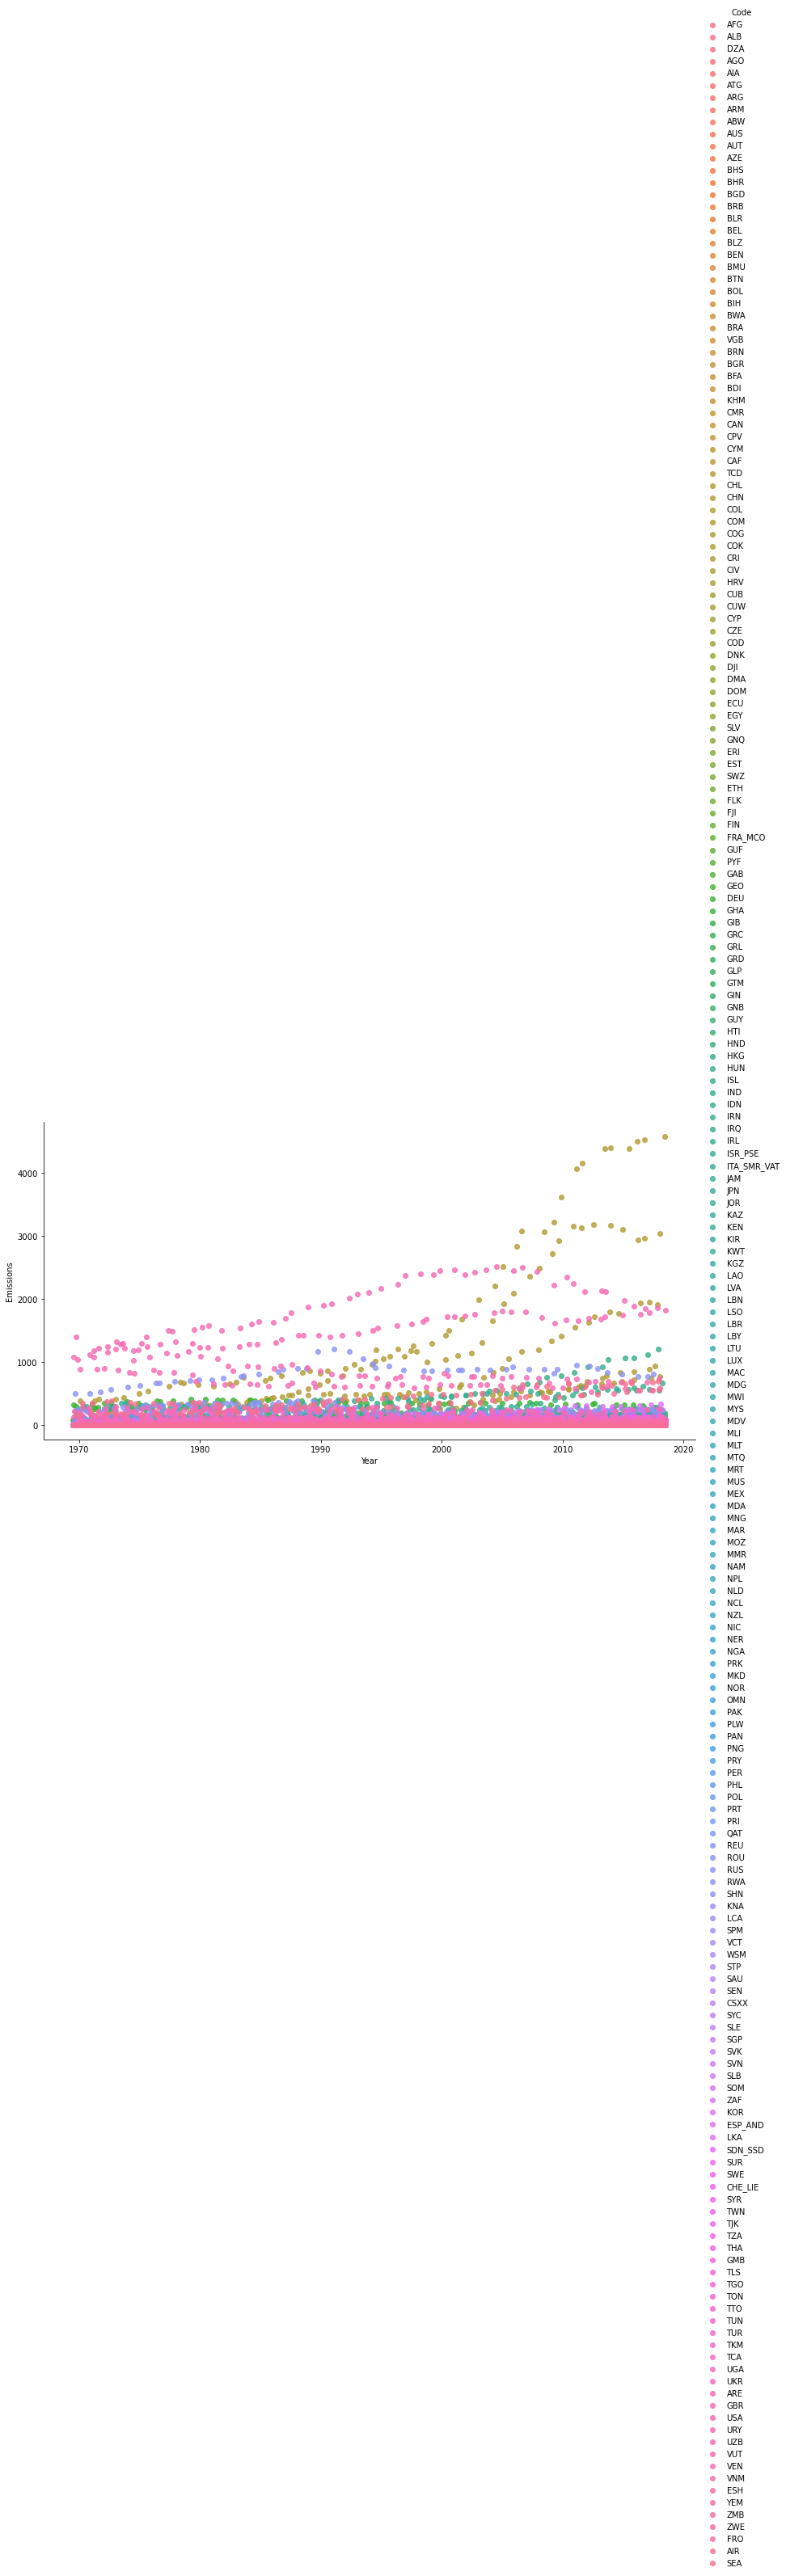

In [44]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=df,fit_reg=False, height=6, aspect=2, 
                x_jitter=.5, y_jitter=.5);
plt.show()

**Exploration of emissions among Countries:** It is clear from this plot that there is a great density of data which lies very low on this scale and relatively sparse data at the higher end, so we will break down our dataset into two groups accordingly.

In [45]:
#creating a dataframe of the countries with the highest emissions from 1970-2018 
#also creating a separate dataframe of countries with the very low emissions 
df_highest = df[df['Emissions'] >= 500]
df_lowest = df[df['Emissions'] <= 1]
df_highest, df_lowest

(      Code                    Name                       Sector  Year  \
 152    RUS                  Russia               Power Industry  1970   
 197    USA           United States               Power Industry  1970   
 403    USA           United States                    Buildings  1970   
 610    USA           United States                    Transport  1970   
 816    USA           United States  Other industrial combustion  1970   
 ...    ...                     ...                          ...   ...   
 50435  IND                   India  Other industrial combustion  2018   
 50544  USA           United States  Other industrial combustion  2018   
 50593  CHN                   China                Other sectors  2018   
 50762  AIR  International Aviation                    Transport  2018   
 50763  SEA  International Shipping                    Transport  2018   
 
          Emissions  
 152     508.338492  
 197    1079.968842  
 403     883.543122  
 610    1039.772133  


**Scope of lowest emissions dataframe:** This dataframe contains 25,436 instances of countries with emission levels of 1 or below in a given year, which is a substantially larger portion of the original dataset.

This can also be noted through using the describe method on the dataframe as the average emissions is very low at 24.5 Mt, while the max is around 4585 Mt.

In [46]:
df.describe()

,Year,Emissions
count,50764.000000,5.037700e+04
mean,1994.000000,2.448694e+01
std,14.142275,1.352670e+02
min,1970.000000,1.931770e-07
25%,1982.000000,8.864667e-02
50%,1994.000000,9.520414e-01
75%,2006.000000,8.277985e+00
max,2018.000000,4.585523e+03


**Visualizing highest emissions data**

<Figure size 1440x1440 with 0 Axes>

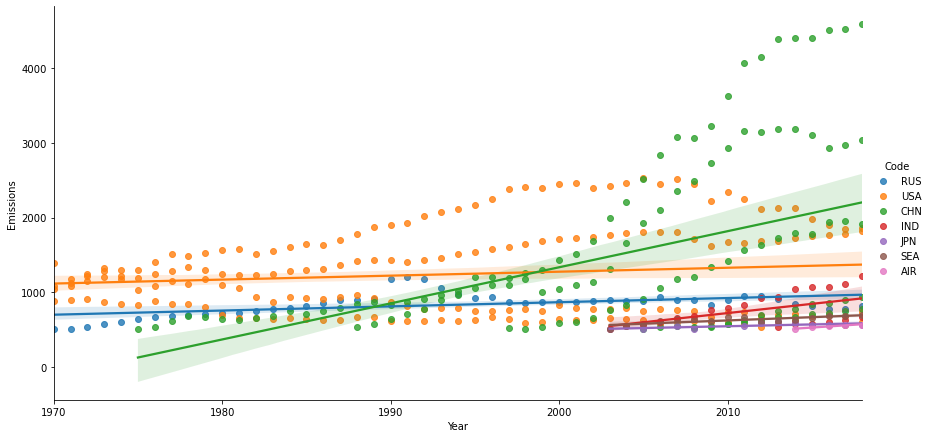

In [47]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=df_highest,fit_reg=True, height=6, aspect=2);
plt.show()

We can see that the overall trends for the majority of these highest emission countries are positive. In addition, we can see from out lmplot of the highest countries that there is an increase in the number of countries which break this 500 emissions barrier after 2000, perhaps indicating changes in environmental policy among those countries. 

In [48]:
df_highest.Name.unique()

array(['Russia', 'United States', 'China', 'India', 'Japan',
       'International Shipping', 'International Aviation'], dtype=object)

In [49]:
df_lowest.Name.nunique()

156

Our lowest emissions dataframe contains 156 countries which all have emission levels equal to or below 1, which is very low in relation to the highest emission countries, showing a clear discrepancy in global emissions among countries.

**Grouping and Visualizing Better Off or Worse Off Countries**

Let's check which countries are better off or worse in 2018 in comparison to 1970 in terms of emissions.

In [50]:
df

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430
...,...,...,...,...,...
50759,YEM,Yemen,Other sectors,2018,2.576755
50760,ZMB,Zambia,Other sectors,2018,1.765269
50761,ZWE,Zimbabwe,Other sectors,2018,1.300813
50762,AIR,International Aviation,Transport,2018,564.612452


Looking at AFG (Afghanistan) for example, we know that there are 5 sectors for a particular country in one year.

In [51]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
207,AFG,Afghanistan,Buildings,1970,0.577234
413,AFG,Afghanistan,Transport,1970,0.233767
620,AFG,Afghanistan,Other industrial combustion,1970,0.067090
826,AFG,Afghanistan,Other sectors,1970,0.531106


We can find the total emissions by using the sum method to sum up the 'Emissions' column.
AFG has around 1.466 Mt in 1970.

In [52]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]['Emissions'].sum()

1.4661586206930002

Let's find all the countries.

In [53]:
countries = df['Code'].unique()
countries

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

Let's find which countries are worse off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [54]:
# define totalIncrease to store countries that are worse off in 2018
totalIncrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() < df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalIncrease = totalIncrease.append(df[df['Code'] == code])
        
print(totalIncrease['Code'].unique())
print(totalIncrease['Code'].nunique())

['AFG' 'ALB' 'DZA' 'AGO' 'AIA' 'ATG' 'ARG' 'ABW' 'AUS' 'AUT' 'BHS' 'BHR'
 'BGD' 'BRB' 'BLR' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'COK' 'CRI' 'CIV' 'CUB' 'CUW' 'CYP' 'COD' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FLK' 'FJI' 'FIN' 'GUF'
 'PYF' 'GAB' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR_PSE'
 'ITA_SMR_VAT' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT' 'LAO' 'LBN' 'LSO'
 'LBR' 'LBY' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS'
 'MEX' 'MDA' 'MNG' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'PRK' 'NOR' 'OMN' 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL'
 'PRT' 'PRI' 'QAT' 'REU' 'RUS' 'RWA' 'SHN' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM'
 'STP' 'SAU' 'SEN' 'CSXX' 'SYC' 'SLE' 'SGP' 'SVN' 'SLB' 'SOM' 'ZAF' 'KOR'
 'ESP_AND' 'LKA' 'SDN_SSD' 'SUR' 'SYR' 'TWN' 'TZA' 'THA'

Let's find which countries are better off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [55]:
# define totalDecrease to store countries that are better off in 2018
totalDecrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() > df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalDecrease = totalDecrease.append(df[df['Code'] == code])
        
print(totalDecrease['Code'].unique())
print(totalDecrease['Code'].nunique())

['ARM' 'AZE' 'BEL' 'BRN' 'BGR' 'HRV' 'CZE' 'DNK' 'FRA_MCO' 'GEO' 'DEU'
 'HUN' 'KGZ' 'LVA' 'LTU' 'LUX' 'MKD' 'PLW' 'ROU' 'SVK' 'SWE' 'CHE_LIE'
 'TJK' 'UKR' 'GBR' 'VUT']
26


**It looks like only 26 countries are better off in 2018 in comparison to the 184 countries that are worse off in 2018.**

Plotting and looking at countries that are worse off in 2018, it seems that a few countries have drastic increases while others are more of a steady increase.

<Figure size 1440x1440 with 0 Axes>

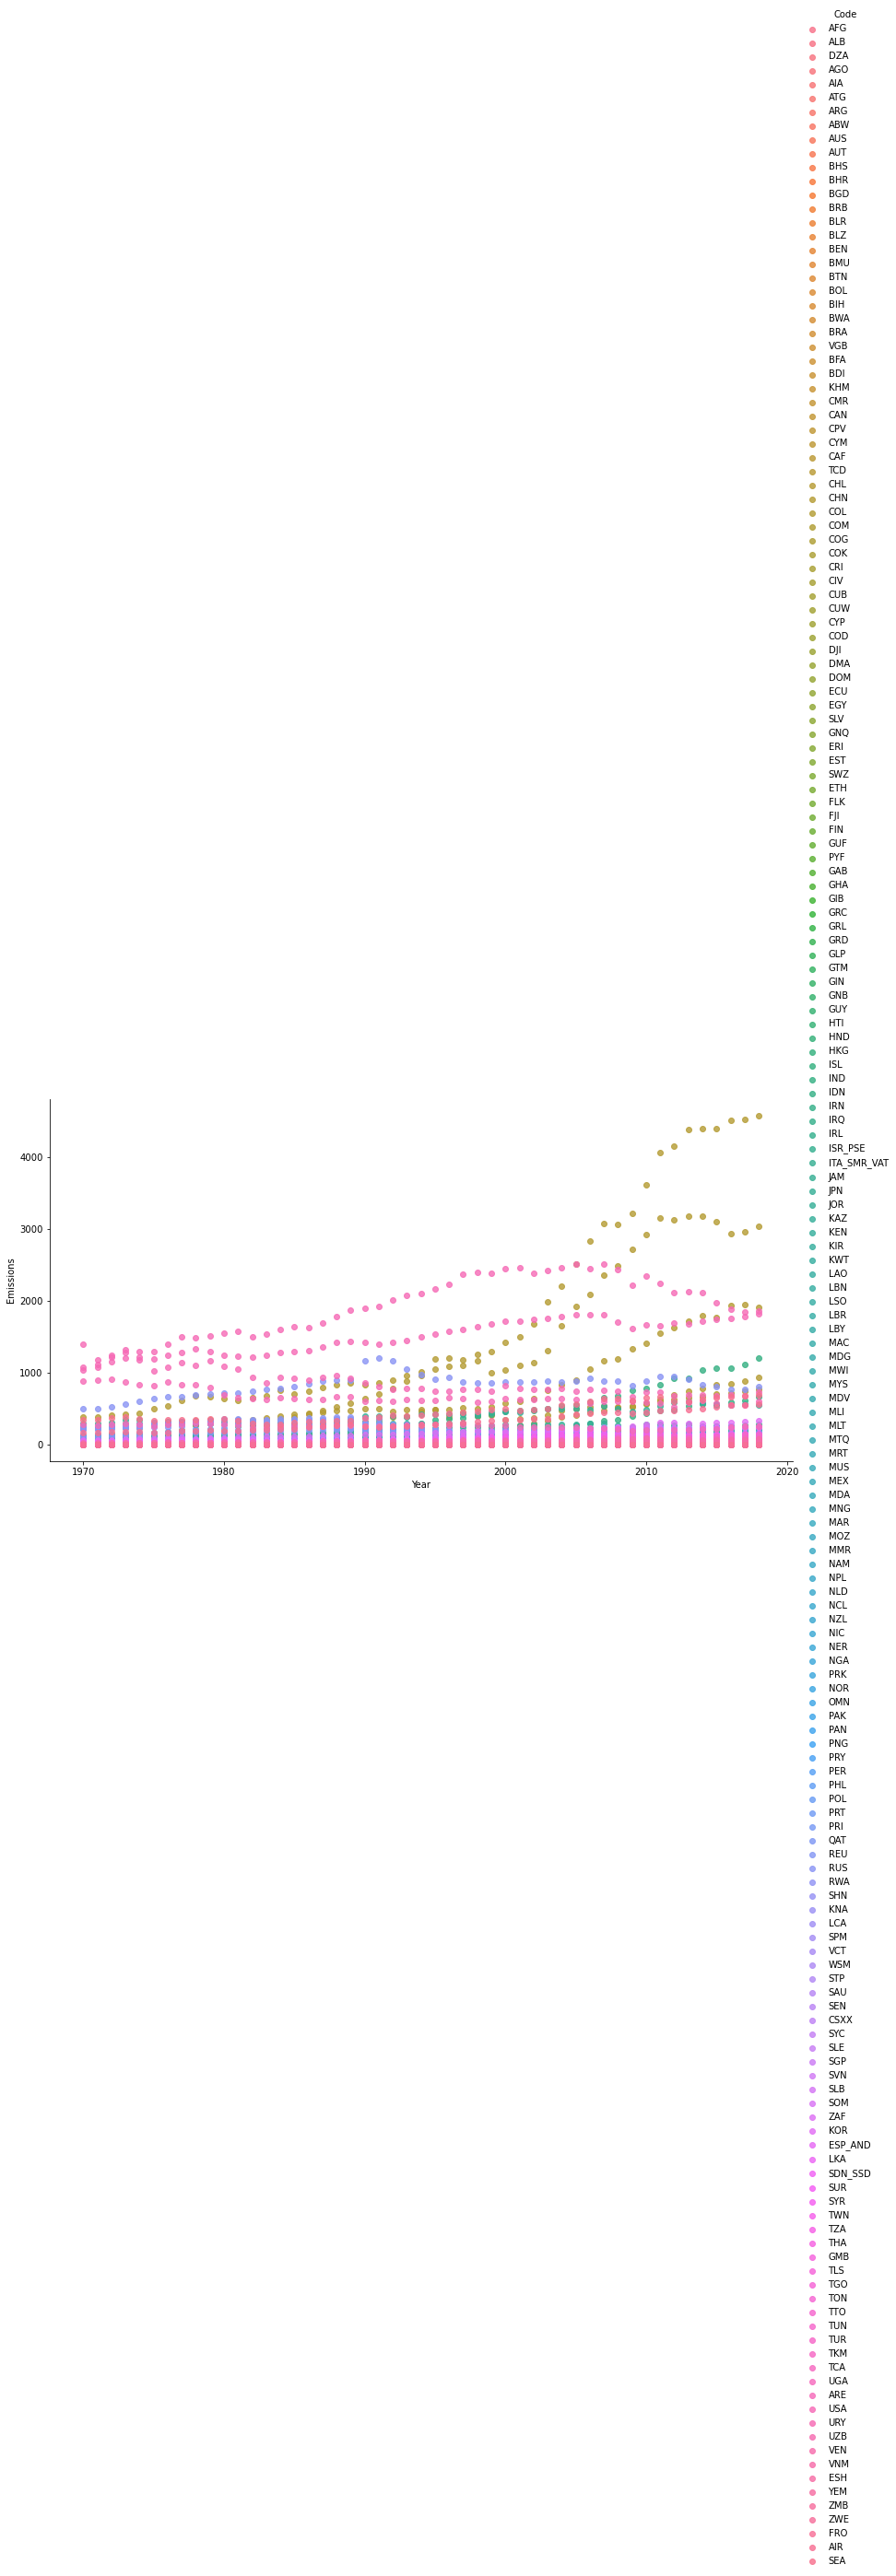

In [56]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalIncrease,fit_reg=False, height=6, aspect=2);
plt.show()

Plotting and looking at countries that are better off in 2018, again it seems that most countries are in a steady decrease as opposed to a drastic decrease.

<Figure size 1440x1440 with 0 Axes>

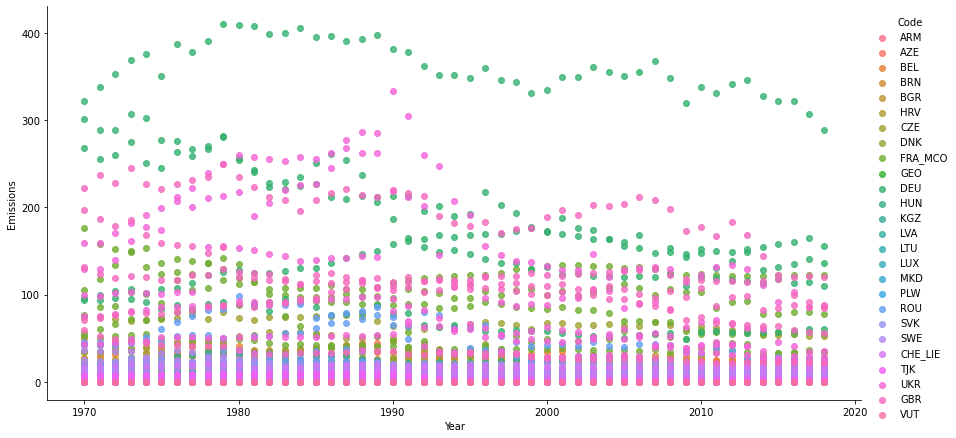

In [57]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalDecrease,fit_reg=False, height=6, aspect=2);
plt.show()

We now want to merge the two dataset and analyze how carbon emissions change over time with respect to each country's environmental policies.

In [58]:
#start by grouping the edgar CO2 dataset on country and adding up the total carbon emissions for each 
#sector in every country
#changing column names for join
grouped = df.rename(columns = {'Name' : 'Country'})
grouped_co2_data = grouped.groupby(['Country', 'Year']).agg('sum')
grouped_co2_data.head()

Emissions
Country     Year           
Afghanistan 1970   1.466159
            1971   1.465293
            1972   1.510878
            1973   1.473702
            1974   1.895983

In [70]:
#grouping policy dataset
#renaming Date of decision to Year to help with the join
grouped_policy = climate_policy_data.rename(columns = {'Date of decision':'Year'})
grouped_policy = grouped_policy.groupby(['Country', 'Year']).agg('sum')
grouped_policy.head(50)

Country ISO  \
Country             Year                                                        
Afghanistan         2015.0                                                AFG   
Albania             2010.0                                                ALB   
                    2015.0                                                ALB   
Algeria             1999.0                                                DZA   
                    2003.0                                                DZA   
                    2004.0                                          DZADZADZA   
                    2005.0                                             DZADZA   
                    2006.0                                                DZA   
                    2010.0                                                DZA   
                    2011.0                                          DZADZADZA   
                    2015.0                                                DZA   
Andorra             2020.0                                                AND   
Angola              2008.0                                             AGOAGO   
                    2010.0                                             AGOAGO   
                    2012.0                                             AGOAGO   
                    2013.0                                                AGO   
                    2015.0                                                AGO   
                    2020.0                                                AGO   
Antigua and Barbuda 2015.0                                                ATG   
Argentina           1994.0                                                ARG   
                    1996.0                                                ARG   
                    1997.0                                                ARG   
                    1998.0                                                ARG   
                    1999.0                                          ARGARGARG   
                    2001.0                                          ARGARGARG   
                    2002.0                                          ARGARGARG   
                    2003.0                                                ARG   
                    2004.0                                                ARG   
                    2005.0                                             ARGARG   
                    2006.0                                             ARGARG   
                    2007.0                                    ARGARGARGARGARG   
                    2009.0                                          ARGARGARG   
                    2010.0                                          ARGARGARG   
                    2011.0                                             ARGARG   
                    2012.0                                                ARG   
                    2013.0                                             ARGARG   
                    2015.0                                    ARGARGARGARGARG   
                    2016.0                              ARGARGARGARGARGARGARG   
                    2017.0                        ARGARGARGARGARGARGARGARGARG   
                    2018.0                        ARGARGARGARGARGARGARGARGARG   
                    2019.0                           ARGARGARGARGARGARGARGARG   
                    2020.0                                                ARG   
Armenia             2015.0                                                ARM   
Australia           1989.0                                             AUSAUS   
                    1990.0                                                AUS   
                    1992.0                                                AUS   
                    1997.0                                             AUSAUS   
                    1998.0                                 AUSAUSAUSAUSAUSAUS   
                

In [88]:
#merging two grouped datasets
merged_data = pd.merge(grouped_policy, grouped_co2_data, how = 'left', on = ['Country', 'Year'])
merged_data = merged_data.drop(labels = ['Country ISO'], axis = 1)
merged_data

Policy name  \
Country     Year                                                        
Afghanistan 2015.0  Intended Nationally Determined Contribution IS...   
Albania     2010.0  National Energy Efficiency Action Plan 2010-20...   
            2015.0  Nationally Determined Contribution (NDC) to th...   
Algeria     1999.0  Law 99-09 relative to the Management of Energy...   
            2003.0  National Plan of Action and Adaptation to Clim...   
...                                                               ...   
Zimbabwe    2010.0  Tax Incentives for Renewable Energy Zimbabwe (...   
            2011.0  Biofuels Blending Mandate Zimbabwe (2011)Energ...   
            2012.0             National Energy Policy Zimbabwe (2012)   
            2013.0  Petroleum (Fuel Quality) Regulations Zimbabwe ...   
            2015.0  National Climate Change Response Strategy Zimb...   

                                                         Policy Title  \
Country     Year                                                        
Afghanistan 2015.0  Intended Nationally Determined Contribution IS...   
Albania     2010.0   National Energy Efficiency Action Plan 2010-2018   
            2015.0           Nationally Determined Contribution (NDC)   
Algeria     1999.0     Law 99-09 relative to the Management of Energy   
            2003.0  National Plan of Action and Adaptation to Clim...   
...                                                               ...   
Zimbabwe    2010.0                Tax Incentives for Renewable Energy   
            2011.0  Biofuels Blending MandateEnergy Regulatory Aut...   
            2012.0                             National Energy Policy   
            2013.0               Petroleum (Fuel Quality) Regulations   
            2015.0  National Climate Change Response StrategyInten...   

                    Emissions  
Country     Year               
Afghanistan 2015.0   9.800058  
Albania     2010.0   4.592990  
            2015.0   4.709439  
Algeria     1999.0  81.689896  
            2003.0  93.707535  
...                       ...  
Zimbabwe    2010.0   9.995111  
            2011.0  11.976472  
            2012.0  12.483545  
            2013.0  12.690498  
            2015.0  12.776528  

[1556 rows x 3 columns]

The above dataset contains emissions only from years that a climate policy was passed.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*